# 1. Importing Required Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# 2. Project Definition


In [60]:
data = pd.read_csv("/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv")

In [61]:
# Let's check the first five rows from data
data.head(5)

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1        NaN  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
3        NaN  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
4     1900.0  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [62]:
data.shape

(34857, 21)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

# 3. Exploratory Data Analysis

In [64]:
data.describe

<bound method NDFrame.describe of            Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
0             Jellis   3/09/2016     

## Numerical Features

In [65]:
numerical_columns= data.select_dtypes(['int', 'float']).columns

numerical_columns , len(numeric_features)

(Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
        'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
        'Propertycount'],
       dtype='object'),
 13)


## Categorical Features

In [66]:
categorical_columns = data.select_dtypes('object').columns

categorical_columns, len(categorical_features)

(Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
        'Regionname'],
       dtype='object'),
 8)

In [67]:
#Handle categorical data
for i in data.columns.tolist():
    data[i]=data[i].astype('category').cat.codes

In [68]:
data

Suburb  Address  Rooms  Type  Price  Method  SellerG  Date  Distance  \
0           0    29458      1     0     -1       6      155    58        13   
1           0    32512      1     0   1960       2       33    60        13   
2           0    15389      1     0   1427       2       33    63        13   
3           0     9768      2     2     -1       7      296    63        13   
4           0    25128      2     0   1945       5       33    64        13   
...       ...      ...    ...   ...    ...     ...      ...   ...       ...   
34852     348     5862      3     0   1960       0      152    38        45   
34853     348    16982      1     0   1193       5      321    38        45   
34854     348     7350      1     1    839       2      152    38        45   
34855     348     5421      2     0   1557       5      370    38        45   
34856     348    17743      1     0   1411       0      276    38        45   

       Postcode  ...  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
0            53  ...         1    1       101            -1         -1   
1            53  ...         1    1       177            -1         -1   
2            53  ...         1    0       131           100         40   
3            53  ...         2    1         0            -1         -1   
4            53  ...         2    0       109           259         40   
...         ...  ...       ...  ...       ...           ...        ...   
34852         7  ...         1    3       568            -1         -1   
34853         7  ...         2    1        73           153        157   
34854         7  ...         1    2       195           195        139   
34855         7  ...        -1   -1        -1            -1         -1   
34856         7  ...         1    0       225           151         70   

       CouncilArea  Lattitude  Longtitude  Regionname  Propertycount  
0               31       7082        6434           2            184  
1               31       7155        6556           2            184  
2               31       6781        6328           2            184  
3               31       6628        7185           2            184  
4               31       6714        6372           2            184  
...            ...        ...         ...         ...            ...  
34852           16       6663        2757           6            257  
34853           16       6429        2890           6            257  
34854           16       6092        2561           6            257  
34855           16         -1          -1           6            257  
34856           16       6311        3089           6            257  

[34857 rows x 21 columns]

In [69]:
# Check for duplicate data
data = data.drop_duplicates()

In [70]:
outliers=[]
def detect_outliers(data):
    
    threshold=3 # 3rd Standard Deviation
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [71]:
outlier_pt = detect_outliers(data)
outlier_pt

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U6'), dtype('float64')) -> None

### Handling missing values
We cannot just ignore or remove the missing observation. They must be handled carefully as they can be an indication of something important.
​
As we can see from the result that PoolQC has 99% null values and MiscFeature has 96% and Alley has 93% of null values. So, it’s not a good idea to fill 99% of null values. So, we will drop the column.

In [ ]:
#missing data 
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

# Dropping the columns that have more than 30% of missing values

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
for column in categorical_columns:
    data[column] = data[column].fillna(data[column].mode().iloc[0])

In [ ]:
data.head(20)

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(data["Price"], bins=40, log=True, color = 'fuchsia')
plt.title('Distribution of Price', fontsize=16)

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

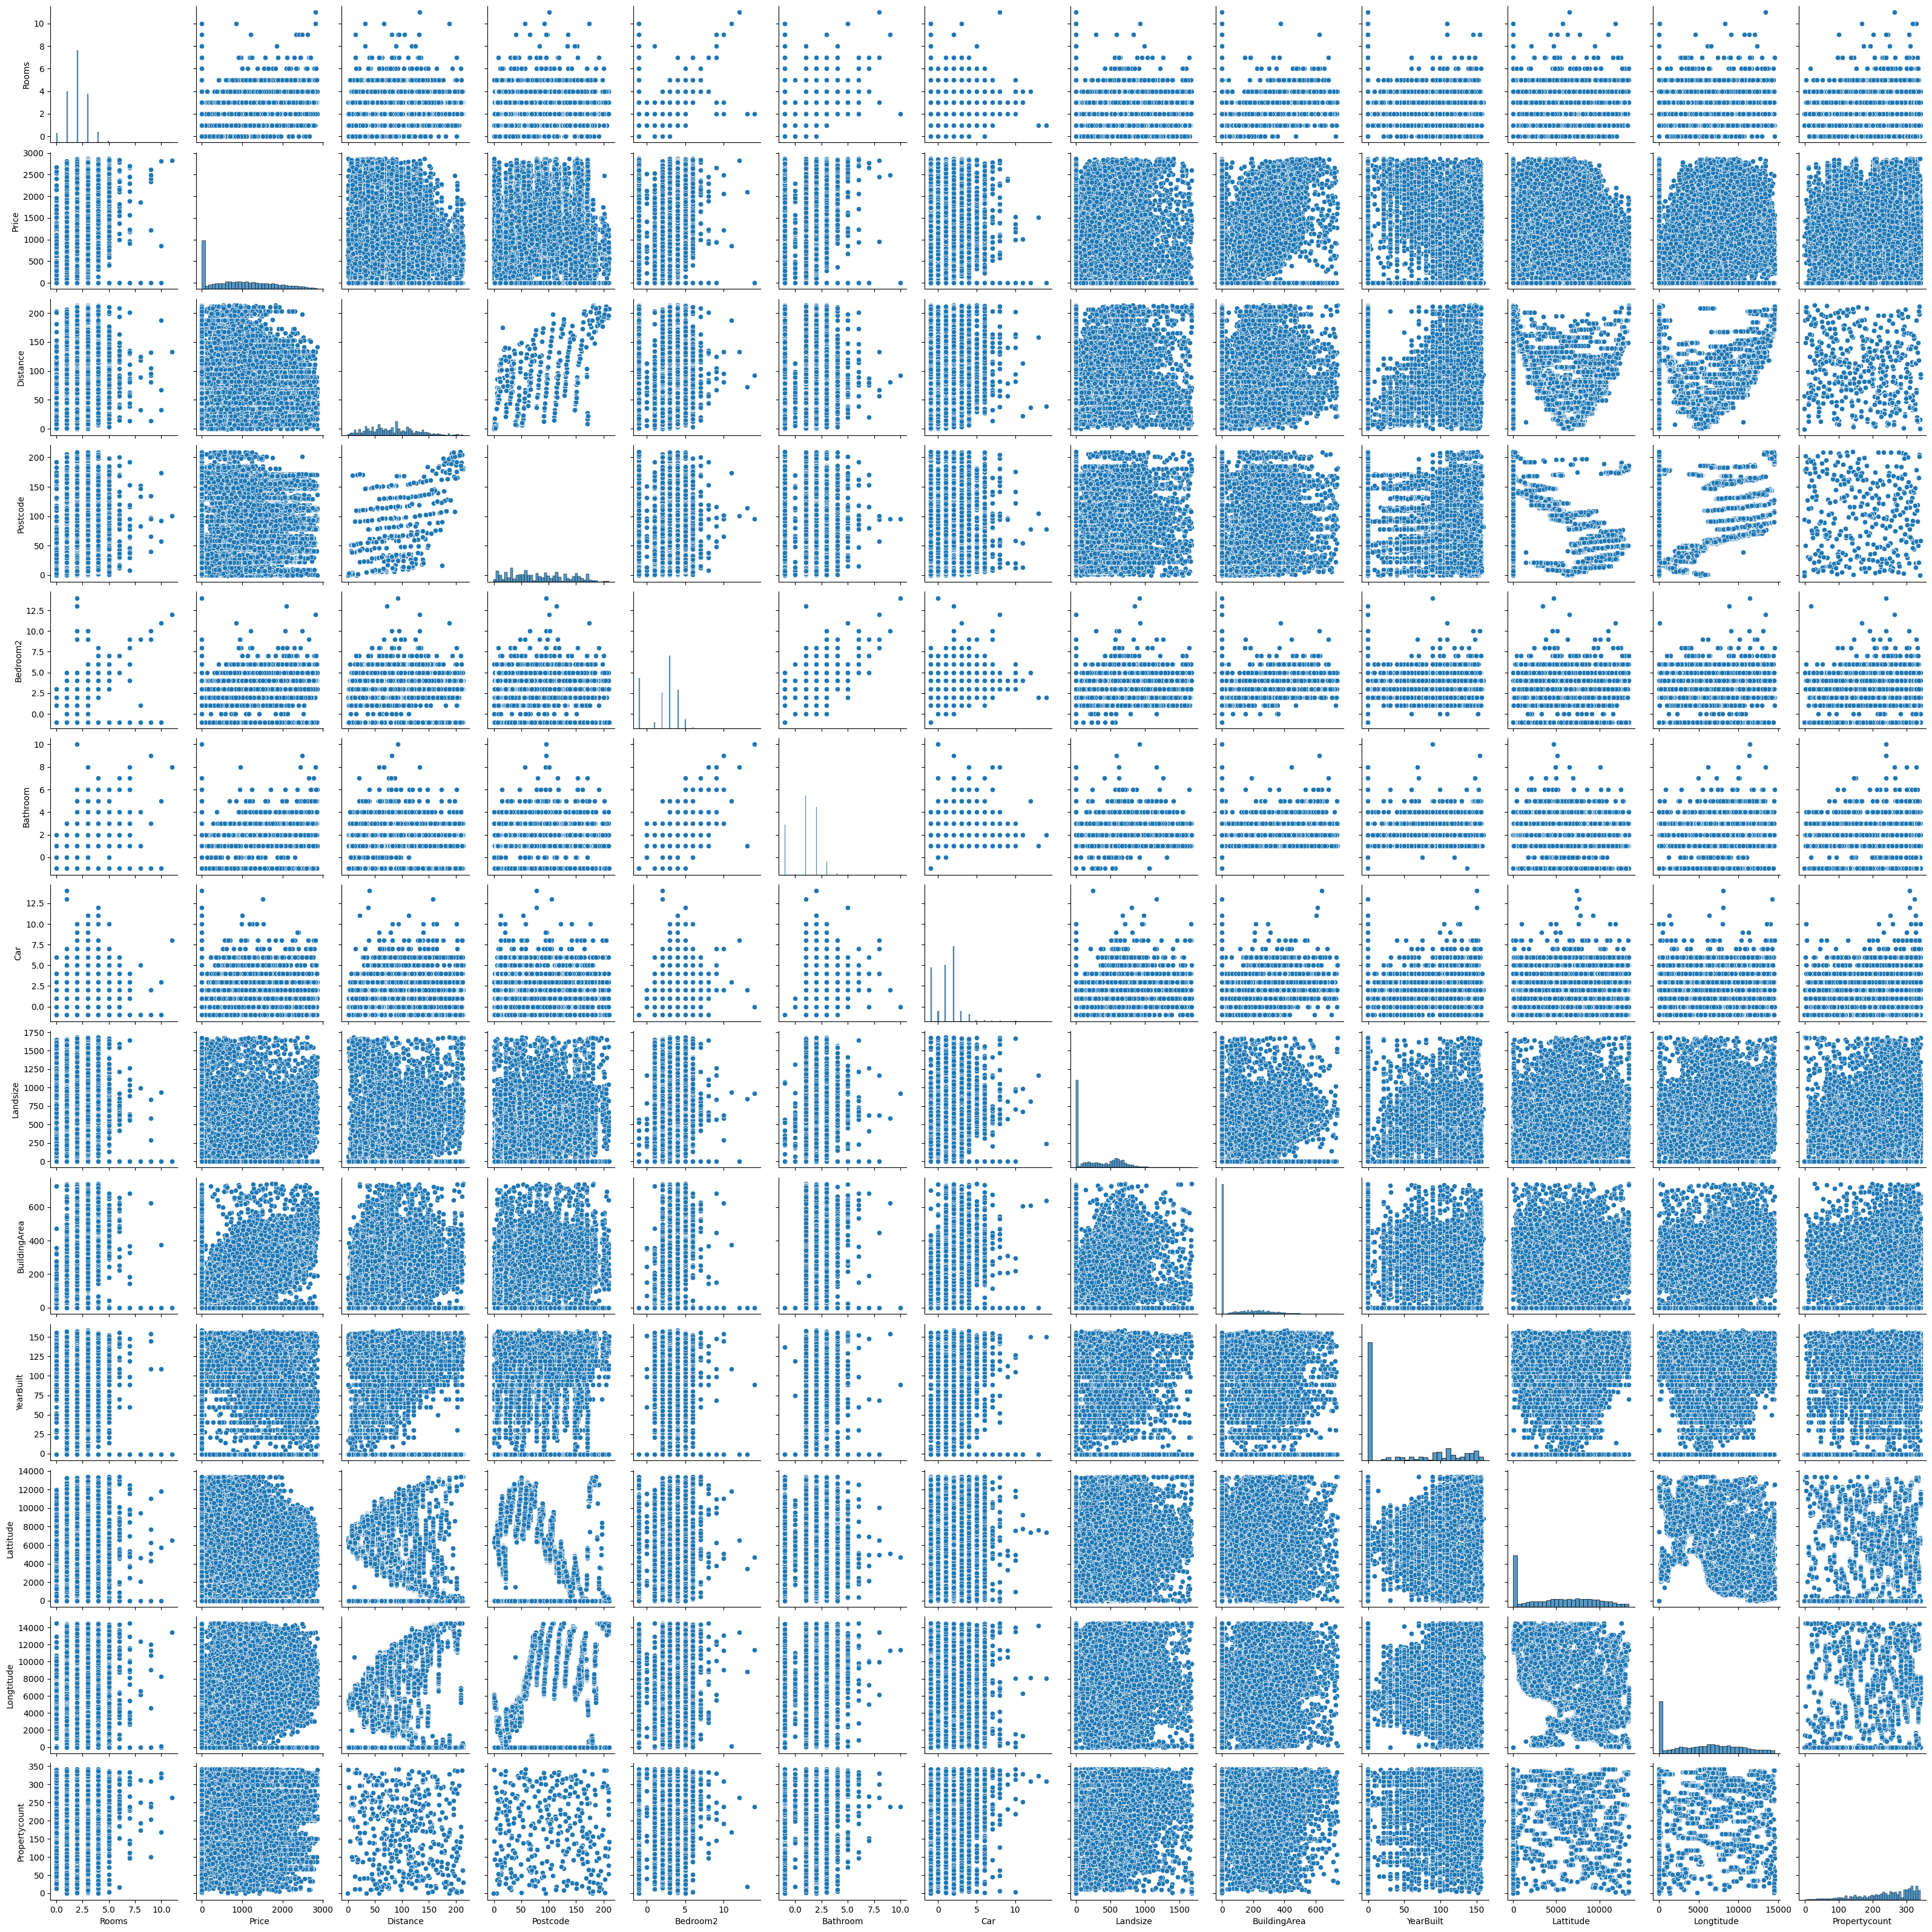

In [72]:
sns.pairplot(data, vars=['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
        'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
        'Propertycount'])
plt.show

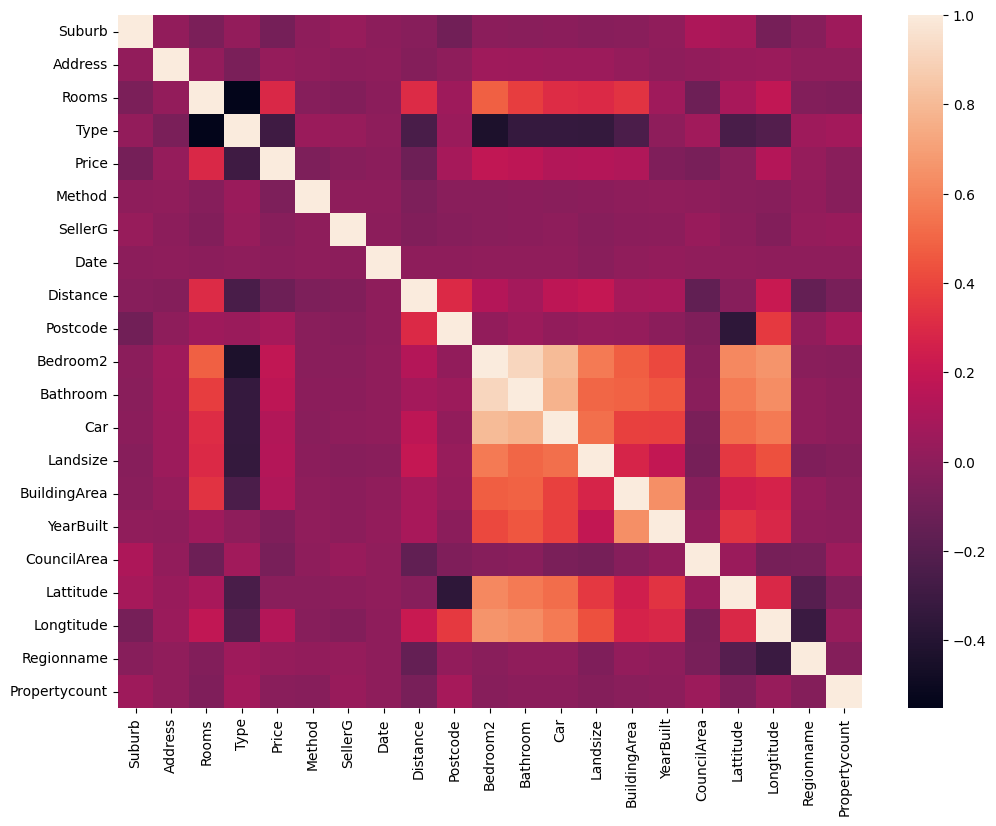

In [73]:
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(data.corr(), ax=ax);

In [ ]:
#split the data into training set and validation set
X=data.drop('Price', axis=1)
y=data['Price']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.30, random_state=0)

In [ ]:
lr_model = LinearRegression()

lr_model.fit(train_X, train_Y)